##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


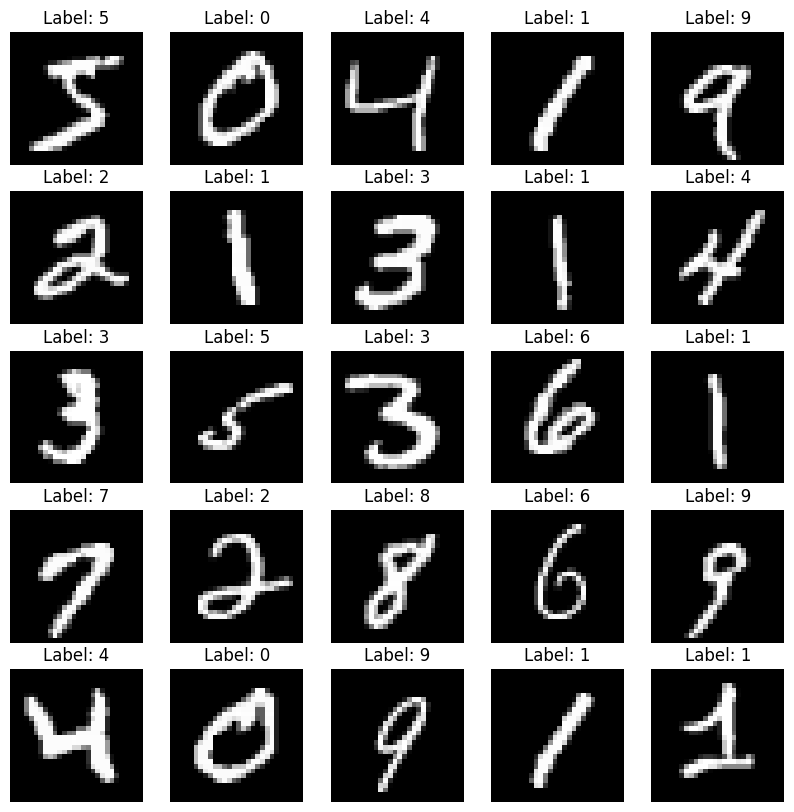

In [5]:
import matplotlib.pyplot as plt

# Plot the first few images in the training set
plt.figure(figsize=(10, 10))
for i in range(25):  # Display the first 25 images
    plt.subplot(5, 5, i + 1)  # 5 rows, 5 columns
    plt.imshow(x_train[i], cmap='gray')  # Show image in grayscale
    plt.title(f"Label: {y_train[i]}")  # Display the label as the title
    plt.axis('off')  # Hide the axis

plt.show()


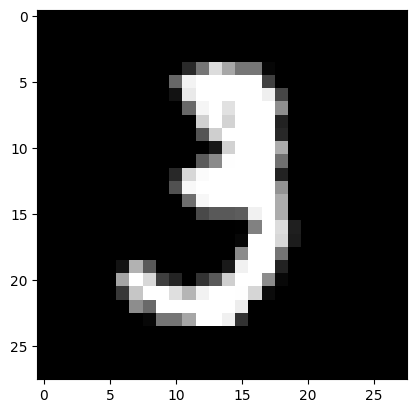

In [6]:
# image @ index 10
plt.imshow(x_train[10], cmap='gray')
plt.show()

uint8
Lable at index 0: 5
Lable at index 1: 0
Lable at index 2: 4
Lable at index 3: 1
Lable at index 4: 9
Lable at index 5: 2
Lable at index 6: 1
Lable at index 7: 3
Lable at index 8: 1
Lable at index 9: 4
Lable at index 10: 3
Lable at index 11: 5
Lable at index 12: 3
Lable at index 13: 6
Lable at index 14: 1
Lable at index 15: 7
Lable at index 16: 2
Lable at index 17: 8
Lable at index 18: 6
Lable at index 19: 9
Lable at index 20: 4
Lable at index 21: 0
Lable at index 22: 9
Lable at index 23: 1
Lable at index 24: 1


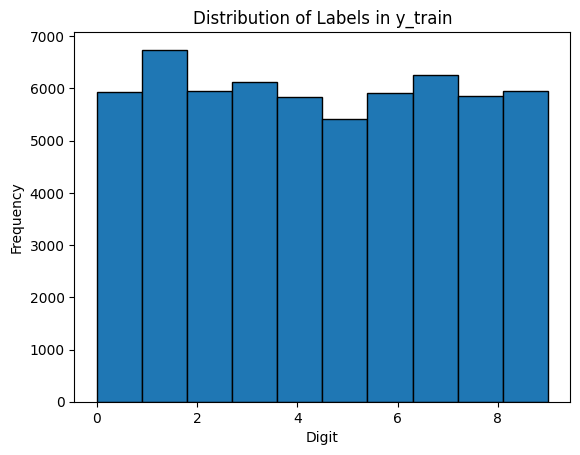

In [22]:
print(y_train.dtype)

for i in range(25):
  print(f"Lable at index {i}: {y_train[i]}")

# Plot histogram of labels in y_train
plt.hist(y_train, bins=10, range=(0, 9), edgecolor='black')
plt.title("Distribution of Labels in y_train")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()


In [7]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [8]:
# Get the number of pixels in a single image
num_pixels = x_train[0].shape[0] * x_train[0].shape[1]
print("Number of pixels in each image:", num_pixels)


Number of pixels in each image: 784


In [11]:
# Get the pixel values of the image at index 10
image_pixels = x_train[1]

# Print the pixel values as an ndarray
print("Pixel values of image at index 10:")
print(image_pixels)

Pixel values of image at index 10:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

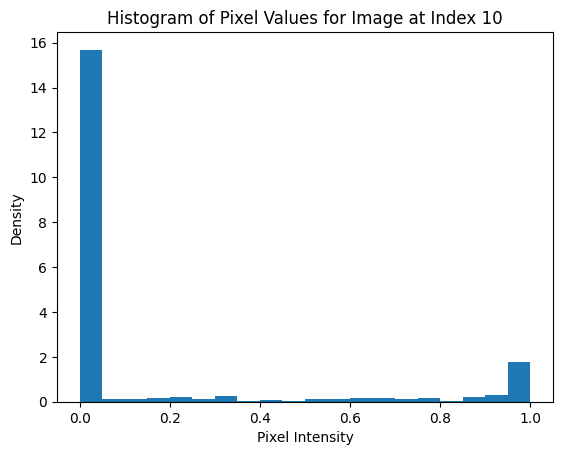

In [12]:
# Flatten the 28x28 image into a 1D array for the histogram
image_pixels_flat = image_pixels.flatten()

# Plot the histogram
plt.hist(image_pixels_flat, bins=20, range=(0, 1), density=True)
plt.title("Histogram of Pixel Values for Image at Index 10")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")
plt.show()

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [24]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.2550928 ,  1.1333318 ,  0.787001  , -0.45131975, -0.46676937,
        -0.4093564 ,  0.09343323, -0.4010333 , -0.14022888, -0.40545613]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [25]:
tf.nn.softmax(predictions).numpy()

array([[0.06851624, 0.2746494 , 0.19425362, 0.05630841, 0.05544515,
        0.05872158, 0.09708598, 0.05921236, 0.0768561 , 0.05895106]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [27]:
loss_fn(y_train[:1], predictions).numpy()

2.834948

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [28]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [29]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8587 - loss: 0.4790
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9547 - loss: 0.1517
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9667 - loss: 0.1097
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9731 - loss: 0.0906
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9775 - loss: 0.0766


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [30]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9771 - loss: 0.0756


[0.07556896656751633, 0.9771000146865845]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [31]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [32]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.7447084e-07, 7.6543900e-09, 1.7398474e-06, 6.0043437e-04,
        6.3851757e-11, 3.9628247e-07, 5.9233884e-13, 9.9938405e-01,
        1.4276534e-06, 1.1806842e-05],
       [1.7019559e-10, 2.7236429e-06, 9.9999535e-01, 1.9683816e-06,
        1.0007451e-19, 1.5639147e-08, 5.4001432e-11, 4.7992338e-14,
        3.7154539e-08, 4.1771985e-15],
       [3.5412748e-07, 9.9804413e-01, 5.1641813e-04, 1.2495882e-05,
        3.4873632e-05, 1.0161639e-05, 8.6817436e-06, 1.3204672e-03,
        5.1592113e-05, 8.0499365e-07],
       [9.9993718e-01, 2.7983291e-11, 1.2347074e-05, 2.3312239e-08,
        1.2978725e-07, 4.8283891e-07, 7.5614184e-06, 4.0643608e-05,
        9.5251549e-09, 1.6147549e-06],
       [1.7938127e-06, 3.6499685e-09, 7.1702298e-06, 7.2109081e-08,
        9.9033254e-01, 7.4075831e-07, 1.6002869e-06, 1.9658708e-04,
        4.3821001e-06, 9.4552133e-03]], dtype=float32)>

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).
